# Processing change over time with pandas

Sometimes data is easy to graph and communicate, and sometimes it takes a few extra steps. Let's take a look at `visas-by-continent.csv` in the `data/` folder.

**Open it without moving it.**

In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('data/visas-by-continent.csv')
df.head()

,year,Africa,Asia,Europe,North America,Oceania,South America,Unknown
0,1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1,1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
2,1999,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
3,2000,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
4,2001,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


## Checking our data

- How many columns and rows does it have?
- What is the data type of each column?

In [2]:
df.dtypes

year               int64
Africa           float64
Asia             float64
Europe           float64
North America    float64
Oceania          float64
South America    float64
Unknown          float64
dtype: object

## Making a simple sample plot

I worked on this data a bit for you, so it's **almost** very easy to graph. Just take the dataframe and `.plot()` it.

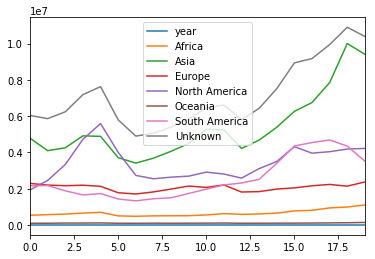

In [3]:
df.plot()

That x axis looks terrible, and "year" isn't really a country. Let's fix that.

## Improving our data to improve our plot

We can improve the x axis and get rid of the 'year' column if we **switch to a datetime index.** This requires the following steps:

- Convert the year into a **datetime column**,
- Set it as our index,
- and Graph it again

Be sure to specify the **format** when converting to a date.

In [4]:
df['year'] = pd.to_datetime(df['year'], format="%Y")
df.head()

,year,Africa,Asia,Europe,North America,Oceania,South America,Unknown
0,1997-01-01,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1,1998-01-01,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
2,1999-01-01,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
3,2000-01-01,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
4,2001-01-01,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


In [5]:
df.dtypes

year             datetime64[ns]
Africa                  float64
Asia                    float64
Europe                  float64
North America           float64
Oceania                 float64
South America           float64
Unknown                 float64
dtype: object

In [6]:
df.set_index('year', inplace = True)
df.head()

,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997-01-01,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1998-01-01,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
1999-01-01,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
2000-01-01,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
2001-01-01,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


How can we compare the change in visas between different continents when their populations are so much different?

## Tough comparisons made easy with percent change

If we're looking at one set of values that's in the billions and another in the thousands, it's **very tough to see on a graphic.** 

Instead of looking at raw values, a better way of thinking about this is **percent change.** If one thing goes up 10% and the other goes up 50%, we can make a simple comparison!

You can do this in pandas by selecting a column and asking for `.pct_change()`.

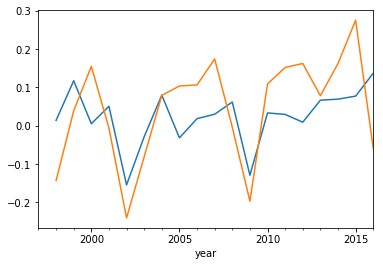

In [7]:
df['Oceania'].pct_change().plot()
df['Asia'].pct_change().plot()

It's missing the first value because it wasn't changing from anything before! You can also easily **plot the results.**

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

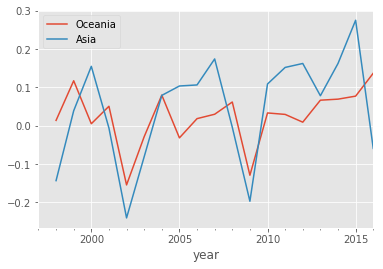

In [9]:
df['Oceania'].pct_change().plot(legend=True)
df['Asia'].pct_change().plot(legend=True)

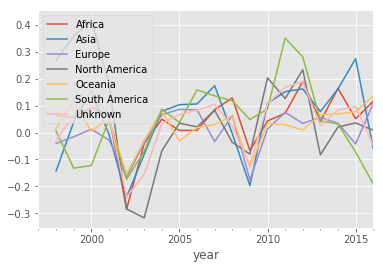

In [10]:
#% change all at the same time 
df.pct_change().plot()

In [11]:
df.pct_change().head().dropna()

,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1998-01-01,0.063100,-0.143139,-0.040213,0.268923,0.013877,0.005183,-0.028842
1999-01-01,0.055109,0.038919,-0.015658,0.357353,0.117144,-0.132360,0.064419
2000-01-01,0.092892,0.154722,0.012378,0.417448,0.005136,-0.122526,0.151590
2001-01-01,0.065229,-0.006005,-0.027624,0.183268,0.050648,0.047057,0.061225


## Friendly, friendly data

If we look at our data, **every column is a category we'd like to calculate percent change on**. We can actually use `df.pct_change()` to do it for every single column.

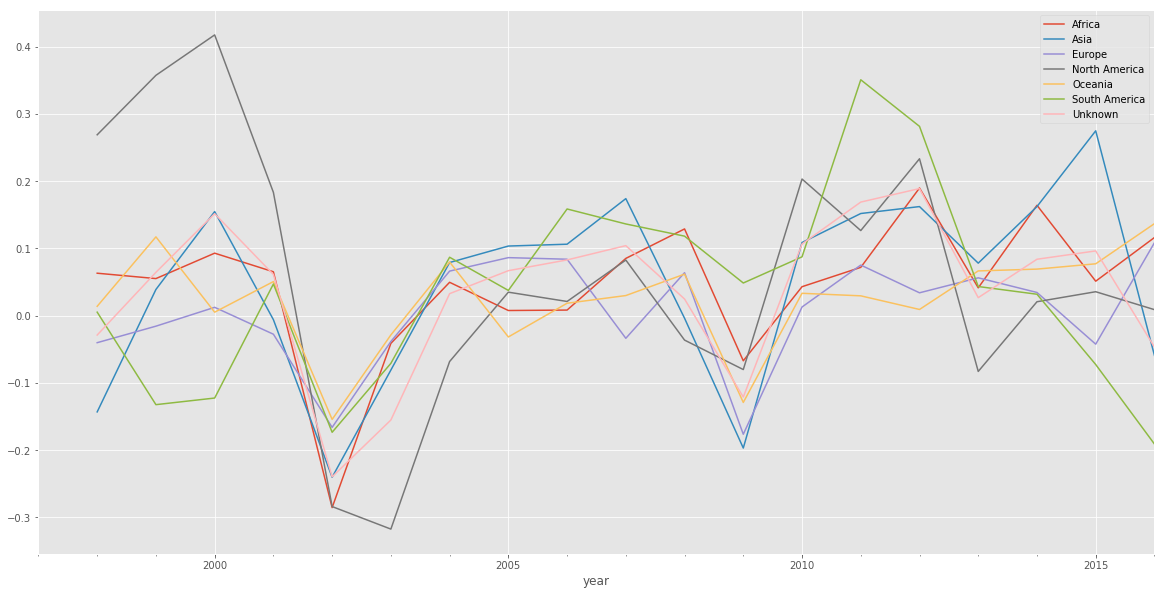

In [12]:
df.pct_change().plot(figsize=(20, 10))

Let's graph it, and use `figsize` to make it big enough that the legend doesn't get in the way of everything.

# Long vs. wide data

Using `pct_change` is easy when we have our set of data as a column. This makes a lot of other calculations more difficult, though. **Different analysis and graphing approaches require different formats of data**.

The current format - where a column is a list of observations - is called **wide format.** The more subjects we have, the more columns we have.

In [13]:
wide_df = pd.read_csv("data/visas-by-continent.csv")
wide_df.set_index('year', inplace=True)
wide_df.head()

,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
1999,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
2000,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
2001,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


The other option is called **long data**, where every row is an observation with a category variable.

In [14]:
long_df = pd.read_csv("data/visas-by-continent-long.csv")
long_df.head()

,year,continent,visas
0,1997,Africa,534420.0
1,1998,Africa,568142.0
2,1999,Africa,599452.0
3,2000,Africa,655136.0
4,2001,Africa,697870.0


## Converting long data to wide data

You can convert from long data to wide data using `.pivot`

In [15]:
# Reminder of what long data looks like
long_df.head(2)

,year,continent,visas
0,1997,Africa,534420.0
1,1998,Africa,568142.0


In [16]:
# Turn the year into an index
# And make columns out of all of the values in 'continent'
# and turn the visas column into the cells
long_df.pivot(index='year', columns='continent', values='visas').head()

continent,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
1999,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
2000,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
2001,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


## Converting wide data to long data

You can convert from wide data to long data using `.melt`

In [17]:
# Let's remind ourselves what it looks like
wide_df.head(2)

,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0


In [18]:
# Bring the year out as a real column again
wide_df.head(2).reset_index()

,year,Africa,Asia,Europe,North America,Oceania,South America,Unknown
0,1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1,1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0


In [19]:
# convert the column into the variable "CONTINENT"
# and the value in the cell to the column "VISAS"
# and separate them based on the "year"
wide_df.reset_index().melt(var_name='continent', value_name='visas', id_vars=['year'])

,year,continent,visas
0,1997,Africa,534420.00
1,1998,Africa,568142.00
2,1999,Africa,599452.00
3,2000,Africa,655136.00
4,2001,Africa,697870.00
5,2002,Africa,498682.00
6,2003,Africa,478112.00
7,2004,Africa,501824.00
8,2005,Africa,505656.00
9,2006,Africa,509844.00
